## Data Representation in Scikite-learn

* Machine learning is about creating models from data: for that reason, we’ll start by
discussing how data can be represented in order to be understood by the computer.
The best way to think about data within Scikit-Learn is in terms of tables of data.

`Data as Table`

In [1]:
import seaborn as sns
iris =sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/home/kshitij/Desktop/Learn_Along_AI-ML/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


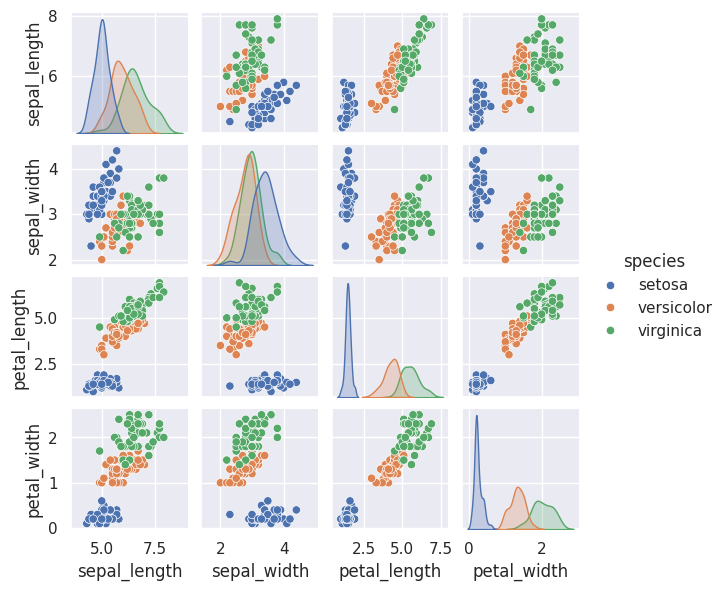

In [2]:
%matplotlib inline
import seaborn as sns
sns.set()
sns.pairplot(iris, hue='species', size=1.5)

In [3]:
X_iris =iris.drop('species', axis=1)
print(X_iris.shape)

y_iris =iris['species']
print(y_iris.shape)

(150, 4)
(150,)


`Supervised learning example: Simple linear regression`

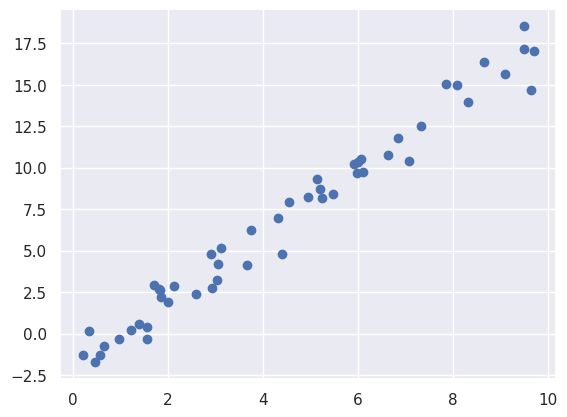

In [4]:
import matplotlib.pyplot as plt
import numpy as np

rng =np.random.RandomState(42)
x =10 *rng.rand(50)
y =2 * x -2 + rng.randn(50)
plt.scatter(x, y)

In [5]:
# Choose a class of model

from sklearn.linear_model import LinearRegression

In [6]:
# Choos model Hyperparameters -> for our example, we can instantiate the LinearRegression class and specify that we whould like to fit the intercept using the fit_intercept hyperparameter

model =LinearRegression(fit_intercept=True)
model


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [7]:
# Arrange data into a  fetuare matrix and target vector

X =x[:, np.newaxis]
X.shape

(50, 1)

In [8]:
# Fit the model to your data

model.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [9]:
model.coef_

array([1.9776566])

In [10]:
model.intercept_

np.float64(-1.9033107255311155)

In [11]:
# Predict labels for unknown data

xfit =np.linspace(-1, 11)

# As before, we need to coerce these x values into a [n_samples, n_features] features matrix, after which we can feed it to the model

Xfit =xfit[:, np.newaxis]
yfit =model.predict(Xfit)

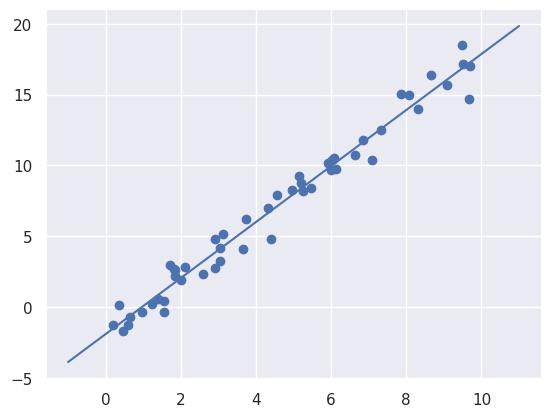

In [12]:
plt.scatter(x,y)
plt.plot(xfit, yfit)

`Supervised learning example: Iris classification`

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X_iris,y_iris,test_size=0.2, random_state=42)

In [14]:
from sklearn.naive_bayes import GaussianNB # choos model class

model =GaussianNB () # instantiate model
model.fit(X_train, y_train)  # fit the model to data
y_pred =model.predict(X_test)  # predict the new data


* With an accuracy topping 100%, we see that even this very naive classification algo‐
rithm is effective for this particular dataset!

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

1.0

`Unsupervised learning example: Iris dimensionality`

In [16]:
from sklearn.decomposition import PCA  # choose the model class
model =PCA(n_components=2)  # Instantiate the model with hyperparametr

model.fit(X_iris)  # fit the data, Notice y is not specified
X_2D =model.transform(X_iris)

`Unsupervised learning: Iris clustering`

In [17]:
from sklearn.mixture import GaussianMixture # choose the model class

model =GaussianMixture(n_components=3, covariance_type='full')  # Instantiate the model / hyperparameter
model.fit(X_iris)
y_gmm =model.predict(X_iris)   # determine cluster labels


iris['cluster'] =y_gmm


## `Application: Exploring Handwritten Digits`

`Loading and Visualizing the digit data`

In [18]:
from sklearn.datasets import load_digits

digits =load_digits()
digits.images.shape

(1797, 8, 8)

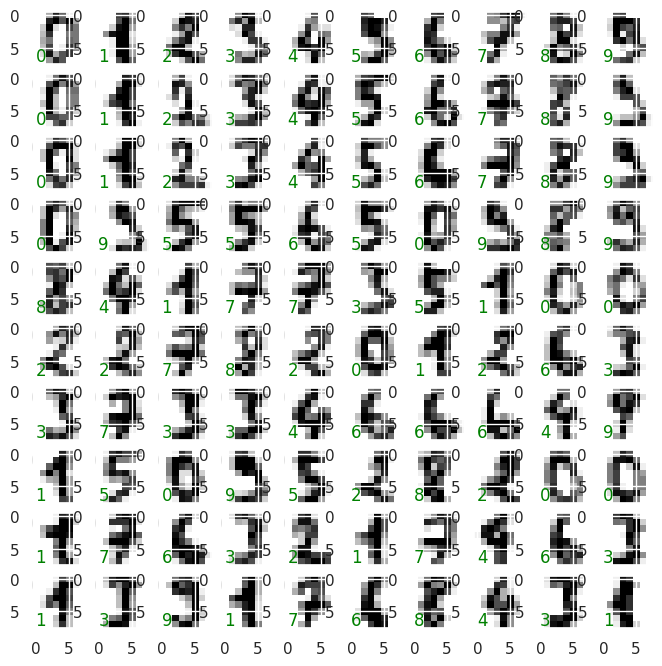

In [19]:
# Visualize the first hundred of these

import matplotlib.pyplot as plt

fig, axes =plt.subplots(10, 10, figsize=(8,8))

for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [20]:
X =digits.data

y= digits.target
X.shape,y.shape

((1797, 64), (1797,))

`Unsupervised learning: Dimensionality reduction`

In [21]:
from sklearn.manifold import Isomap
iso =Isomap(n_components=2)
iso.fit(digits.data)
data_projected =iso.transform(digits.data)
data_projected.shape

/home/kshitij/Desktop/Learn_Along_AI-ML/.venv/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:360: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/kshitij/Desktop/Learn_Along_AI-ML/.venv/lib/python3.11/site-packages/scipy/sparse/_index.py:174: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

/tmp/ipykernel_2718/2916645910.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral',20))


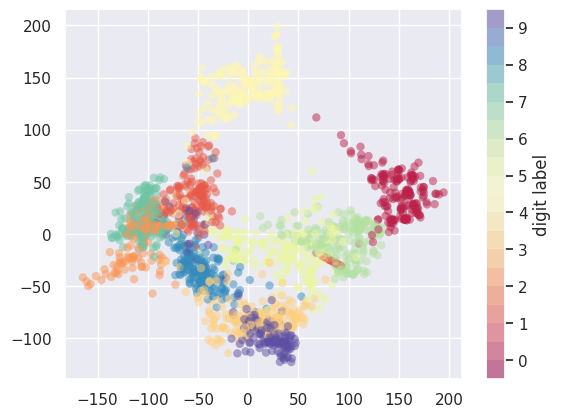

In [22]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral',20))

plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

`Classification on digits`

In [23]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB
model =GaussianNB()
model.fit(X_train, y_train)
y_pred =model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8472222222222222

Text(109.44999999999997, 0.5, 'true value')

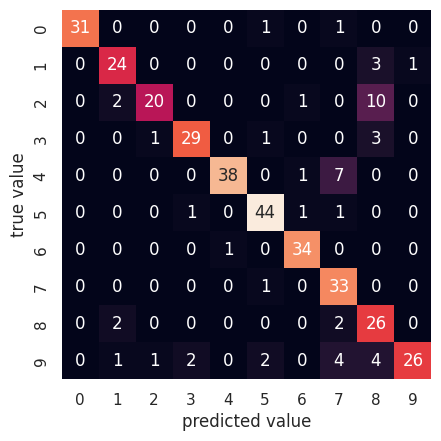

In [25]:
from sklearn.metrics import confusion_matrix
mat =confusion_matrix(y_test, y_pred)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel("true value")

# Hyperparameters and Model Validation

`Model validation the wrong way`

In [26]:
from sklearn.datasets import load_iris
iris =load_iris()

X =iris.data
y =iris.target

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier(n_neighbors=1)

In [28]:
# Train the model

model.fit(X,y)
y_pred =model.predict(X)

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

1.0

`Model validation the right way: Holdout sets`

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.5, random_state=42)

# Fit the model on one set of data
model.fit(X_train,y_train)

#evaluate the model on the second set of data
y_pred =model.predict(X_test)
accuracy_score(y_test, y_pred)


0.9733333333333334

`Model validation via cross-validation`

In [31]:
y1_pred =model.fit(X_train,y_train).predict(X_test)
y2_pred =model.fit(X_test, y_test).predict(X_train)

accuracy_score(y_train, y1_pred), accuracy_score(y_test, y2_pred)


(0.3466666666666667, 0.32)

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [33]:
from sklearn.model_selection import LeaveOneOut

scores =cross_val_score(model, X,y,cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [34]:
scores.mean()

np.float64(0.96)

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))


In [36]:
# lets create some data to which we will fit our model

import numpy as np
def make_data(N, err=1.0, rseed=1):
    rng =np.random.RandomState(rseed)
    X=rng.rand(N, 1) ** 2
    y =10 -1 /(X.ravel() + 0.1)

    if err > 0:
        y += err * rng.randn(N)

    return X,y
X,y =make_data(40)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.2  2. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

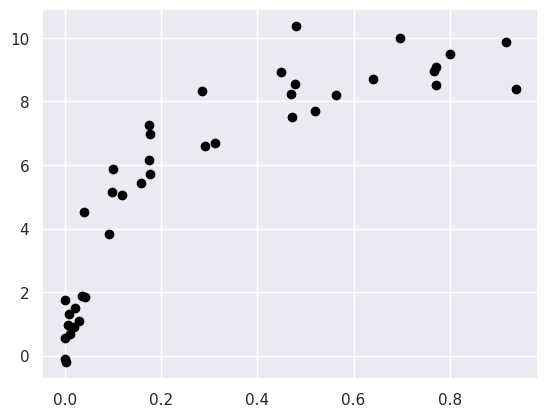

In [37]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn  as sns
sns.set()

X_test =np.linspace(-0.2, 2,2, 500)

plt.scatter(X.ravel(), y, color='black')
axis=plt.axis()

for degree in [1, 3,5]:

    y_test =PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree{0}'.format(degree))

plt.xlim(-0.2, 2.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

In [39]:
from sklearn.model_selection import validation_curve
degree =np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialFeatures(), X, y, 'PolynomialFeatures_degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')

TypeError: too many positional arguments

`Validation in Practice: grid Search`

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid ={'polynomialFeatures_degree': np.arange(21),
             'linearregression_fit_intercept': [True, False],
             'linearregression_normalize': [True, False]}

grid =GridSearchCV(PolynomialRegression(), param_grid, cv=7)

grid.fit(X,y)

ValueError: Invalid parameter 'linearregression_fit_intercept' for estimator Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())]). Valid parameters are: ['memory', 'steps', 'transform_input', 'verbose'].

In [41]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
model =grid.best_estimator_

plt.scatter(X.ravel(), y)
lim =plt.axis()
y_test =model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(), y_test, hold=True)
plt.axis(lim)